In [70]:
# First let's import the packages we will use in this project
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

pd.options.mode.chained_assignment = None



# Now we need to read in the data
df = pd.read_csv(r'C:\Users\divan\Downloads\archive (1)\movies.csv')

In [217]:
# Now let's take a look at the data

df.head()

,budget,company,country,director,genre,gross,name,rating,released,runtime,score,star,votes,writer,year,yearcorrect,Year
0,19000000,1426,46,1795,6,46998772,4692,6,1304,146.0,8.4,699,927000.0,2832,1980,1980,11
1,4500000,452,47,1578,1,58853106,3929,6,1127,104.0,5.8,214,65000.0,1158,1980,1980,10
2,18000000,945,47,757,0,538375067,3641,4,1359,124.0,8.7,1157,1200000.0,1818,1980,1980,11
3,3500000,1108,47,889,4,83453539,204,4,1127,88.0,7.7,1474,221000.0,1413,1980,1980,10
4,6000000,1083,47,719,4,39846344,732,6,1170,98.0,7.3,271,108000.0,351,1980,1980,10


In [74]:
# We need to see if we have any missing data
# Let's loop through the data and see if there is anything missing

for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

budget - 28%
company - 0%
country - 0%
director - 0%
genre - 0%
gross - 2%
name - 0%
rating - 1%
released - 0%
runtime - 0%
score - 0%
star - 0%
votes - 0%
writer - 0%
year - 0%


In [112]:
df = df.dropna()

In [79]:
# Data Types for our columns

print(df.dtypes)

budget      float64
company      object
country      object
director     object
genre        object
gross       float64
name         object
rating       object
released     object
runtime     float64
score       float64
star         object
votes       float64
writer       object
year          int64
dtype: object


In [116]:
#change datatype of columns
df['budget'] = df['budget'].astype('int64')
df['gross'] = df['gross'].astype('int64')

In [118]:
df['yearcorrect'] = df['released'].str.extract(pat = '([0-9]{4})').astype(int)

In [215]:
df.head()

,budget,company,country,director,genre,gross,name,rating,released,runtime,score,star,votes,writer,year,yearcorrect,Year
0,19000000,1426,46,1795,6,46998772,4692,6,1304,146.0,8.4,699,927000.0,2832,1980,1980,11
1,4500000,452,47,1578,1,58853106,3929,6,1127,104.0,5.8,214,65000.0,1158,1980,1980,10
2,18000000,945,47,757,0,538375067,3641,4,1359,124.0,8.7,1157,1200000.0,1818,1980,1980,11
3,3500000,1108,47,889,4,83453539,204,4,1127,88.0,7.7,1474,221000.0,1413,1980,1980,10
4,6000000,1083,47,719,4,39846344,732,6,1170,98.0,7.3,271,108000.0,351,1980,1980,10


<Axes: >

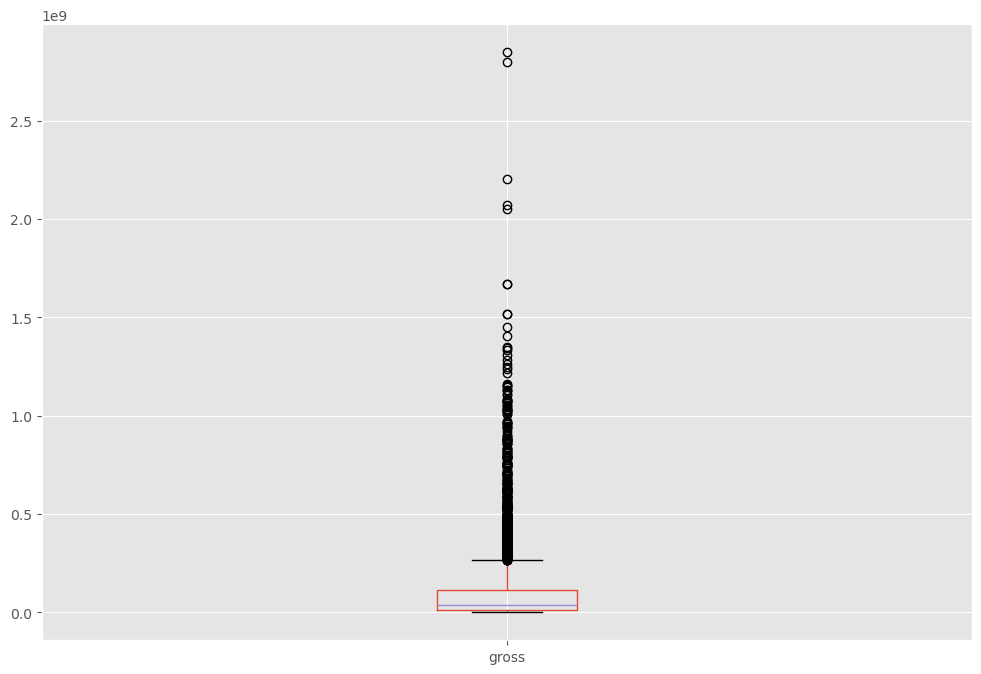

In [122]:
# Are there any Outliers?

df.boxplot(column=['gross'])

In [213]:
df.drop_duplicates().head()

,budget,company,country,director,genre,gross,name,rating,released,runtime,score,star,votes,writer,year,yearcorrect,Year
0,19000000,1426,46,1795,6,46998772,4692,6,1304,146.0,8.4,699,927000.0,2832,1980,1980,11
1,4500000,452,47,1578,1,58853106,3929,6,1127,104.0,5.8,214,65000.0,1158,1980,1980,10
2,18000000,945,47,757,0,538375067,3641,4,1359,124.0,8.7,1157,1200000.0,1818,1980,1980,11
3,3500000,1108,47,889,4,83453539,204,4,1127,88.0,7.7,1474,221000.0,1413,1980,1980,10
4,6000000,1083,47,719,4,39846344,732,6,1170,98.0,7.3,271,108000.0,351,1980,1980,10


In [219]:
# Order our Data a little bit to see

df.sort_values(by=['gross'], inplace=False, ascending=False).head()

,budget,company,country,director,genre,gross,name,rating,released,runtime,score,star,votes,writer,year,yearcorrect,Year
5445,237000000,1382,47,785,0,2847246203,386,5,527,162.0,7.8,1534,1100000.0,1263,2009,2009,7
7445,356000000,983,47,105,0,2797501328,388,5,137,181.0,8.4,1470,903000.0,513,2019,2019,5
3045,200000000,1382,47,785,6,2201647264,4909,5,534,194.0,7.8,1073,1100000.0,1263,1997,1997,7
6663,245000000,945,47,768,0,2069521700,3643,5,529,138.0,7.8,356,876000.0,1806,2015,2015,7
7244,321000000,983,47,105,0,2048359754,389,5,145,149.0,8.4,1470,897000.0,513,2018,2018,5


<Axes: xlabel='gross', ylabel='budget'>

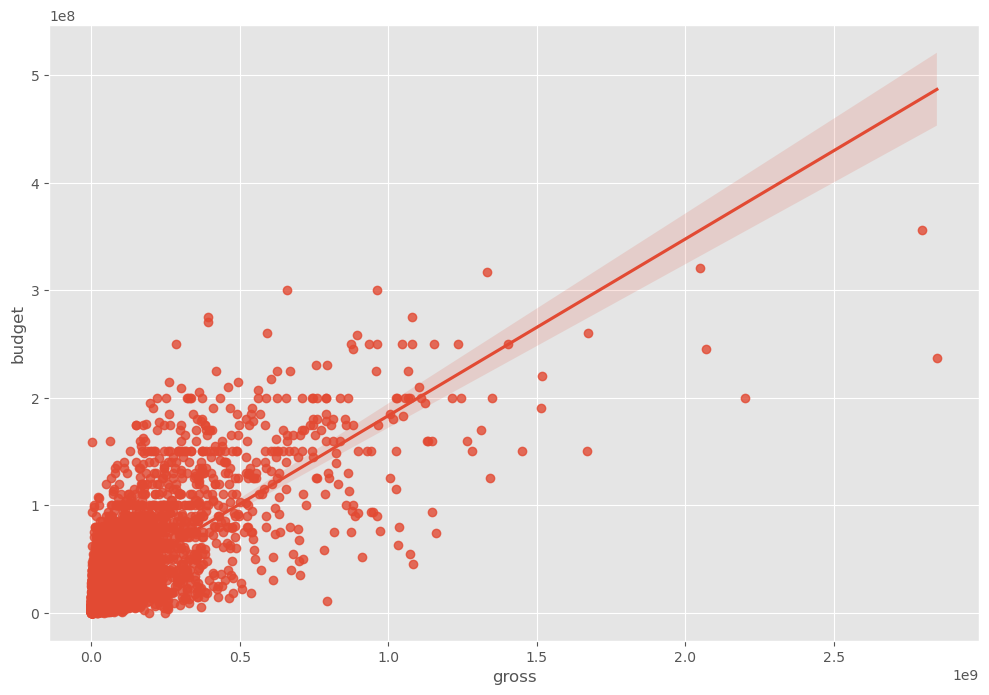

In [128]:
# plot budge vs gross using seaborn
sns.regplot(x="gross", y="budget", data=df)

<Axes: xlabel='score', ylabel='gross'>

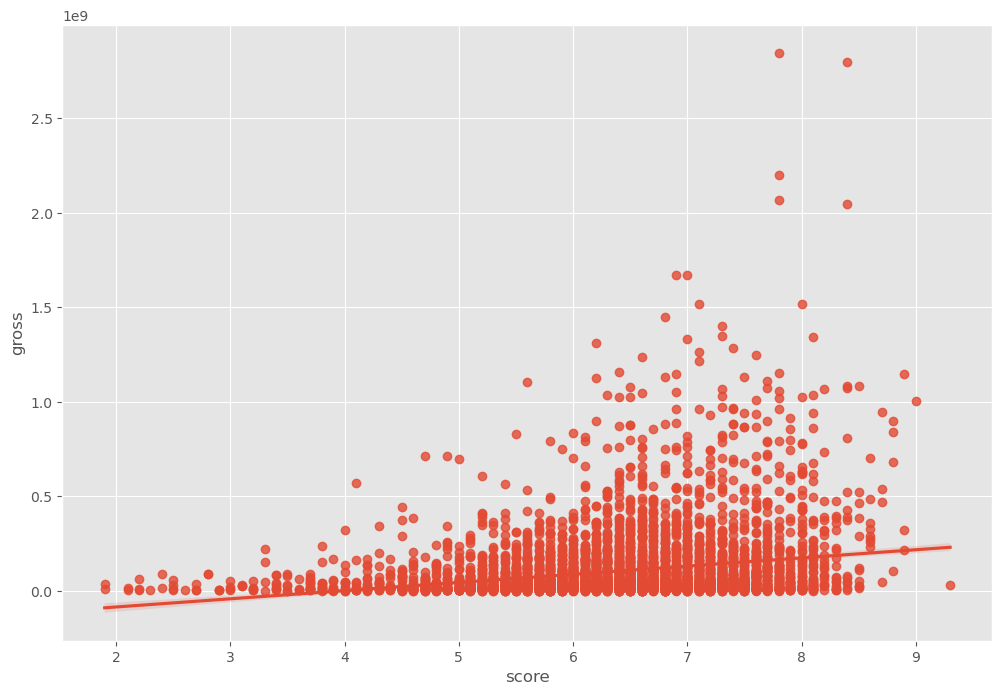

In [130]:
# plo
t sns.regplot(x="score", y="gross", data=df)

In [148]:
# Correlation Matrix between all numeric columns

df.corr(method='pearson', numeric_only=True)

,budget,gross,runtime,score,votes,year,yearcorrect
budget,1.000000,0.740247,0.318695,0.072001,0.439675,0.327722,0.320312
gross,0.740247,1.000000,0.275796,0.222556,0.614751,0.274321,0.268721
runtime,0.318695,0.275796,1.000000,0.414068,0.352303,0.075077,0.075294
score,0.072001,0.222556,0.414068,1.000000,0.474256,0.056386,0.061923
votes,0.439675,0.614751,0.352303,0.474256,1.000000,0.206021,0.203098
year,0.327722,0.274321,0.075077,0.056386,0.206021,1.000000,0.998726
yearcorrect,0.320312,0.268721,0.075294,0.061923,0.203098,0.998726,1.000000


In [150]:
df.corr(method ='kendall',numeric_only=True)

,budget,gross,runtime,score,votes,year,yearcorrect
budget,1.000000,0.512057,0.231278,-0.006406,0.346274,0.220833,0.213719
gross,0.512057,1.000000,0.176979,0.124943,0.553625,0.239539,0.232372
runtime,0.231278,0.176979,1.000000,0.292254,0.205344,0.064824,0.064793
score,-0.006406,0.124943,0.292254,1.000000,0.350185,0.039389,0.043400
votes,0.346274,0.553625,0.205344,0.350185,1.000000,0.296512,0.293044
year,0.220833,0.239539,0.064824,0.039389,0.296512,1.000000,0.991304
yearcorrect,0.213719,0.232372,0.064793,0.043400,0.293044,0.991304,1.000000


In [152]:
df.corr(method ='spearman',numeric_only=True)

,budget,gross,runtime,score,votes,year,yearcorrect
budget,1.000000,0.692958,0.330794,-0.009971,0.493461,0.312886,0.302535
gross,0.692958,1.000000,0.257400,0.183192,0.745793,0.351045,0.340529
runtime,0.330794,0.257400,1.000000,0.412155,0.300621,0.095444,0.095507
score,-0.009971,0.183192,0.412155,1.000000,0.495409,0.057741,0.063674
votes,0.493461,0.745793,0.300621,0.495409,1.000000,0.427623,0.422988
year,0.312886,0.351045,0.095444,0.057741,0.427623,1.000000,0.998694
yearcorrect,0.302535,0.340529,0.095507,0.063674,0.422988,0.998694,1.000000


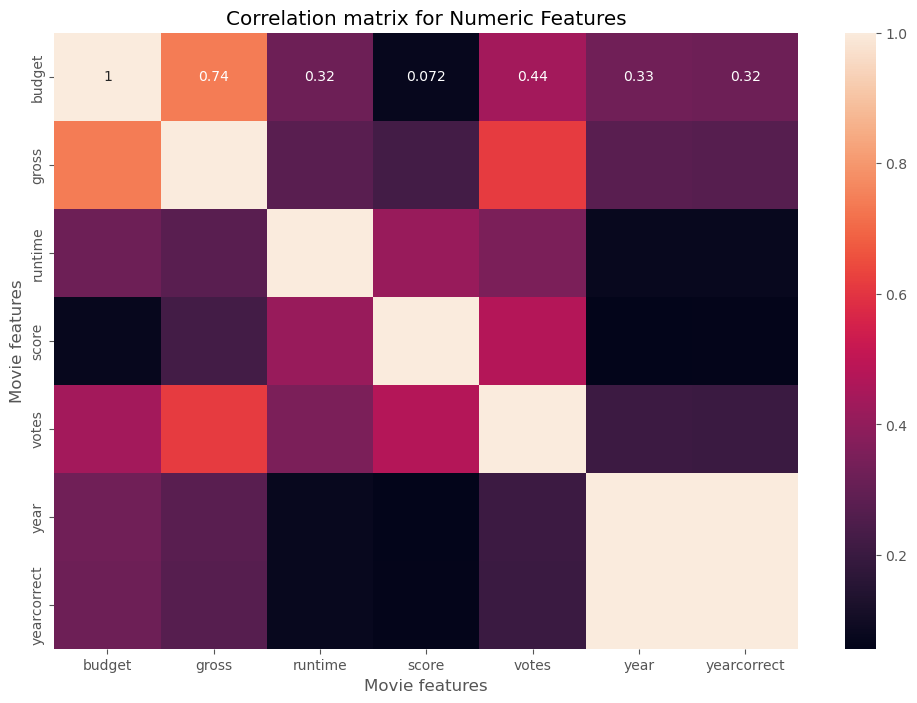

In [154]:
correlation_matrix = df.corr(numeric_only=True)

sns.heatmap(correlation_matrix, annot = True)

plt.title("Correlation matrix for Numeric Features")

plt.xlabel("Movie features")

plt.ylabel("Movie features")

plt.show()

In [156]:
# Using factorize - this assigns a random numeric value for each unique categorical value

df.apply(lambda x: x.factorize()[0]).corr(method='pearson')

,budget,company,country,director,genre,gross,name,rating,released,runtime,score,star,votes,writer,year,yearcorrect
budget,1.000000,-0.053573,0.016348,0.124051,0.020893,0.305284,0.288955,0.203698,0.309616,0.134894,-0.005493,0.138015,0.359065,0.208088,0.319135,0.303136
company,-0.053573,1.000000,0.153912,0.483737,0.015127,0.545924,0.535369,-0.026286,0.546033,-0.010695,-0.008555,0.442307,0.007423,0.477503,0.537731,0.506753
country,0.016348,0.153912,1.000000,0.095349,-0.003314,0.094820,0.098110,-0.004547,0.096807,0.040813,0.016567,0.098071,-0.021562,0.098623,0.095073,0.088955
director,0.124051,0.483737,0.095349,1.000000,0.036671,0.751737,0.725411,0.096014,0.750825,-0.026918,-0.006583,0.636705,0.187909,0.717990,0.747785,0.708189
genre,0.020893,0.015127,-0.003314,0.036671,1.000000,0.032033,0.028413,-0.116507,0.031251,0.000056,-0.027402,0.045497,-0.009983,0.033975,0.031765,0.031669
gross,0.305284,0.545924,0.094820,0.751737,0.032033,1.000000,0.967925,0.172703,0.998490,0.047728,-0.015744,0.720811,0.307248,0.811356,0.996371,0.945958
name,0.288955,0.535369,0.098110,0.725411,0.028413,0.967925,1.000000,0.169808,0.966086,0.048980,-0.020083,0.695124,0.297305,0.791872,0.965461,0.921688
rating,0.203698,-0.026286,-0.004547,0.096014,-0.116507,0.172703,0.169808,1.000000,0.171063,0.032265,0.036114,0.115694,0.097619,0.128909,0.179456,0.169681
released,0.309616,0.546033,0.096807,0.750825,0.031251,0.998490,0.966086,0.171063,1.000000,0.049650,-0.019486,0.720076,0.313254,0.809858,0.996490,0.945065
runtime,0.134894,-0.010695,0.040813,-0.026918,0.000056,0.047728,0.048980,0.032265,0.049650,1.000000,0.011831,0.033297,0.126362,0.023123,0.055864,0.049194


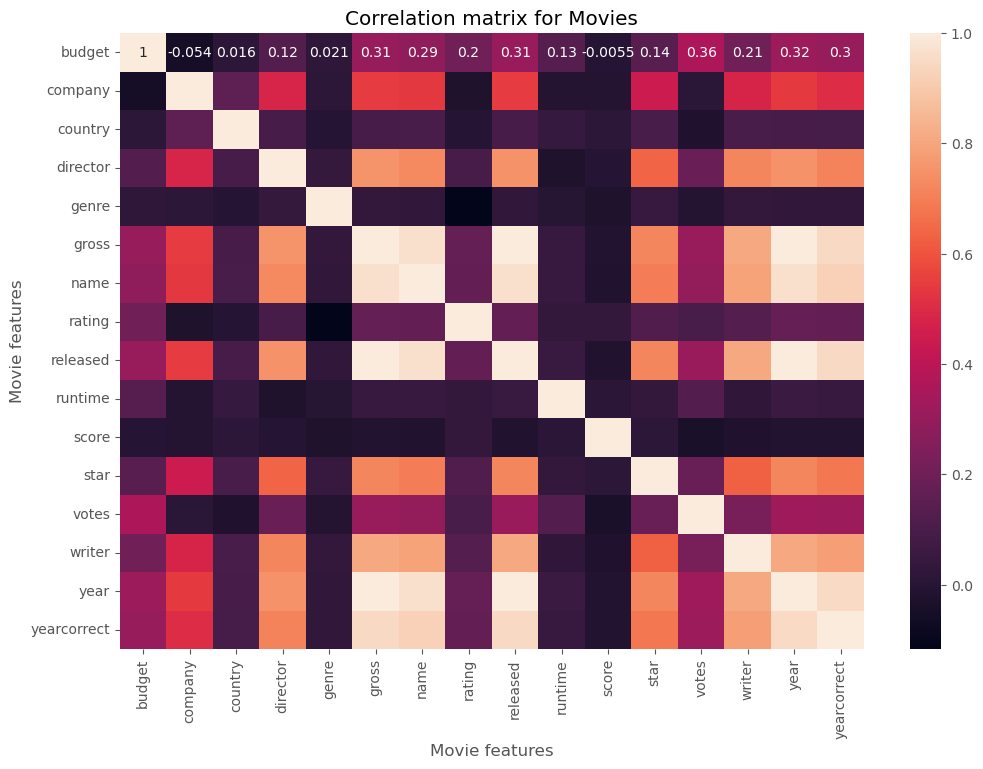

In [158]:
correlation_matrix = df.apply(lambda x: x.factorize()[0]).corr(method='pearson')

sns.heatmap(correlation_matrix, annot = True)

plt.title("Correlation matrix for Movies")

plt.xlabel("Movie features")

plt.ylabel("Movie features")

plt.show()

In [160]:
correlation_mat = df.apply(lambda x: x.factorize()[0]).corr()

corr_pairs = correlation_mat.unstack()

print(corr_pairs)

budget       budget         1.000000
             company       -0.053573
             country        0.016348
             director       0.124051
             genre          0.020893
                              ...   
yearcorrect  star           0.684736
             votes          0.316065
             writer         0.779672
             year           0.950610
             yearcorrect    1.000000
Length: 256, dtype: float64


In [162]:
sorted_pairs = corr_pairs.sort_values(kind="quicksort")

print(sorted_pairs)

genre        rating        -0.116507
rating       genre         -0.116507
budget       company       -0.053573
company      budget        -0.053573
score        votes         -0.041981
                              ...   
director     director       1.000000
country      country        1.000000
company      company        1.000000
year         year           1.000000
yearcorrect  yearcorrect    1.000000
Length: 256, dtype: float64


In [164]:
# We can now take a look at the ones that have a high correlation (> 0.5)

strong_pairs = sorted_pairs[abs(sorted_pairs) > 0.5]

print(strong_pairs)

yearcorrect  company        0.506753
company      yearcorrect    0.506753
name         company        0.535369
company      name           0.535369
year         company        0.537731
                              ...   
director     director       1.000000
country      country        1.000000
company      company        1.000000
year         year           1.000000
yearcorrect  yearcorrect    1.000000
Length: 82, dtype: float64


In [166]:
# Looking at the top 15 compaies by gross revenue

CompanyGrossSum = df.groupby('company')[["gross"]].sum()

CompanyGrossSumSorted = CompanyGrossSum.sort_values('gross', ascending = False)[:15]

CompanyGrossSumSorted = CompanyGrossSumSorted['gross'].astype('int64') 

CompanyGrossSumSorted

company
Warner Bros.                 54610959970
Universal Pictures           51241105418
Columbia Pictures            42356430218
Paramount Pictures           40021704691
Twentieth Century Fox        39542573303
Walt Disney Pictures         35833650748
New Line Cinema              19612851164
Marvel Studios               15065592411
DreamWorks Animation         11873612858
Dreamworks Pictures          11593807697
Touchstone Pictures          10664679494
Metro-Goldwyn-Mayer (MGM)     8937010092
Summit Entertainment          8318570396
Pixar Animation Studios       7886344526
Fox 2000 Pictures             7243673721
Name: gross, dtype: int64

In [221]:
df['Year'] = df['released'].astype(str).str[:4]
df.head()

,budget,company,country,director,genre,gross,name,rating,released,runtime,score,star,votes,writer,year,yearcorrect,Year
0,19000000,1426,46,1795,6,46998772,4692,6,1304,146.0,8.4,699,927000.0,2832,1980,1980,1304
1,4500000,452,47,1578,1,58853106,3929,6,1127,104.0,5.8,214,65000.0,1158,1980,1980,1127
2,18000000,945,47,757,0,538375067,3641,4,1359,124.0,8.7,1157,1200000.0,1818,1980,1980,1359
3,3500000,1108,47,889,4,83453539,204,4,1127,88.0,7.7,1474,221000.0,1413,1980,1980,1127
4,6000000,1083,47,719,4,39846344,732,6,1170,98.0,7.3,271,108000.0,351,1980,1980,1170


In [170]:
df.groupby(['company', 'year'])[["gross"]].sum()

gross
company                             year           
"DIA" Productions GmbH & Co. KG     2003   44350926
"Weathering With You" Film Partners 2019  193457467
.406 Production                     1996      10580
1492 Pictures                       1996  129832389
                                    1999   87423861
...                                             ...
erbp                                2013     587174
i am OTHER                          2015   17986781
i5 Films                            2001   10031529
micro_scope                         2010    7099598
thefyzz                             2017   62198461

[2987 rows x 1 columns]

In [172]:
CompanyGrossSum = df.groupby(['company', 'year'])[["gross"]].sum()

CompanyGrossSumSorted = CompanyGrossSum.sort_values(['gross','company','year'], ascending = False)[:15]

CompanyGrossSumSorted = CompanyGrossSumSorted['gross'].astype('int64') 

CompanyGrossSumSorted

company                year
Walt Disney Pictures   2019    5773131804
Marvel Studios         2018    4018631866
Universal Pictures     2015    3834354888
Twentieth Century Fox  2009    3793491246
Walt Disney Pictures   2017    3789382071
Paramount Pictures     2011    3565705182
Warner Bros.           2011    3223799224
Walt Disney Pictures   2010    3104474158
Paramount Pictures     2014    3071298586
Columbia Pictures      2006    2934631933
                       2019    2932757449
Marvel Studios         2019    2797501328
Warner Bros.           2018    2774168962
Columbia Pictures      2011    2738363306
Warner Bros.           2005    2688767210
Name: gross, dtype: int64

In [174]:
CompanyGrossSum = df.groupby(['company'])[["gross"]].sum()

CompanyGrossSumSorted = CompanyGrossSum.sort_values(['gross','company'], ascending = False)[:15]

CompanyGrossSumSorted = CompanyGrossSumSorted['gross'].astype('int64') 

CompanyGrossSumSorted

company
Warner Bros.                 54610959970
Universal Pictures           51241105418
Columbia Pictures            42356430218
Paramount Pictures           40021704691
Twentieth Century Fox        39542573303
Walt Disney Pictures         35833650748
New Line Cinema              19612851164
Marvel Studios               15065592411
DreamWorks Animation         11873612858
Dreamworks Pictures          11593807697
Touchstone Pictures          10664679494
Metro-Goldwyn-Mayer (MGM)     8937010092
Summit Entertainment          8318570396
Pixar Animation Studios       7886344526
Fox 2000 Pictures             7243673721
Name: gross, dtype: int64

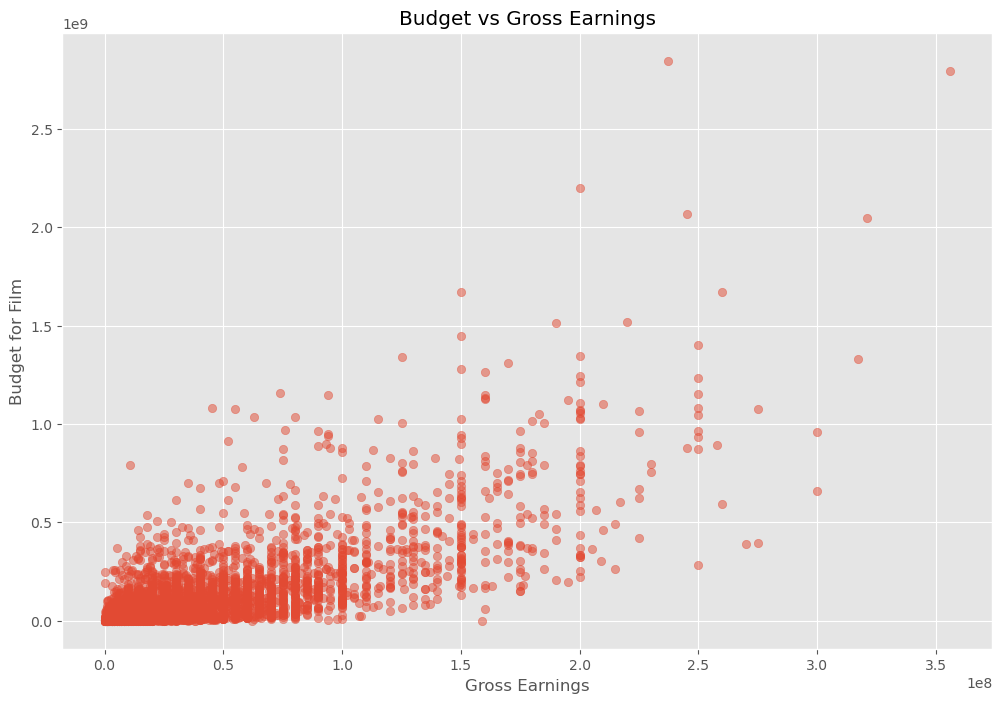

In [176]:
plt.scatter(x=df['budget'], y=df['gross'], alpha=0.5)
plt.title('Budget vs Gross Earnings')
plt.xlabel('Gross Earnings')
plt.ylabel('Budget for Film')
plt.show()

In [223]:
df.head()

,budget,company,country,director,genre,gross,name,rating,released,runtime,score,star,votes,writer,year,yearcorrect,Year
0,19000000,1426,46,1795,6,46998772,4692,6,1304,146.0,8.4,699,927000.0,2832,1980,1980,1304
1,4500000,452,47,1578,1,58853106,3929,6,1127,104.0,5.8,214,65000.0,1158,1980,1980,1127
2,18000000,945,47,757,0,538375067,3641,4,1359,124.0,8.7,1157,1200000.0,1818,1980,1980,1359
3,3500000,1108,47,889,4,83453539,204,4,1127,88.0,7.7,1474,221000.0,1413,1980,1980,1127
4,6000000,1083,47,719,4,39846344,732,6,1170,98.0,7.3,271,108000.0,351,1980,1980,1170


In [180]:
df_numerized = df


for col_name in df_numerized.columns:
    if(df_numerized[col_name].dtype == 'object'):
        df_numerized[col_name]= df_numerized[col_name].astype('category')
        df_numerized[col_name] = df_numerized[col_name].cat.codes
        
df_numerized

,budget,company,country,director,genre,gross,name,rating,released,runtime,score,star,votes,writer,year,yearcorrect,Year
0,19000000,1426,46,1795,6,46998772,4692,6,1304,146.0,8.4,699,927000.0,2832,1980,1980,11
1,4500000,452,47,1578,1,58853106,3929,6,1127,104.0,5.8,214,65000.0,1158,1980,1980,10
2,18000000,945,47,757,0,538375067,3641,4,1359,124.0,8.7,1157,1200000.0,1818,1980,1980,11
3,3500000,1108,47,889,4,83453539,204,4,1127,88.0,7.7,1474,221000.0,1413,1980,1980,10
4,6000000,1083,47,719,4,39846344,732,6,1170,98.0,7.3,271,108000.0,351,1980,1980,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7648,90000000,452,47,16,0,426505244,415,6,904,124.0,6.6,1812,140000.0,2390,2020,2020,9
7649,85000000,1108,47,852,0,319715683,3556,4,713,99.0,6.5,147,102000.0,2309,2020,2020,8
7650,175000000,1397,47,1809,1,245487753,1153,4,904,101.0,5.6,1470,53000.0,2827,2020,2020,9
7651,135000000,12,6,294,1,111105497,3978,4,758,100.0,6.8,640,42000.0,2091,2020,2020,8


In [182]:

df_numerized.corr(method='pearson')

,budget,company,country,director,genre,gross,name,rating,released,runtime,score,star,votes,writer,year,yearcorrect,Year
budget,1.000000,0.170235,0.052977,-0.009662,-0.368523,0.740247,0.023392,-0.203946,0.019952,0.318695,0.072001,-0.021473,0.439675,-0.039466,0.327722,0.320312,0.018328
company,0.170235,1.000000,0.048569,-0.008223,-0.071334,0.149553,0.021697,-0.092357,-0.002407,0.037585,0.020656,0.014082,0.118470,-0.003697,-0.014333,-0.018806,-0.002361
country,0.052977,0.048569,1.000000,0.011133,-0.009164,0.060078,-0.025490,0.008230,-0.017228,-0.034477,-0.043051,-0.009990,0.041551,0.022488,-0.066748,-0.073569,-0.016957
director,-0.009662,-0.008223,0.011133,1.000000,-0.008553,-0.029560,0.015246,0.014656,0.002308,0.017433,0.005413,0.036593,-0.010376,0.261735,-0.038354,-0.037371,0.003497
genre,-0.368523,-0.071334,-0.009164,-0.008553,1.000000,-0.244101,0.010996,0.147796,0.022142,-0.059237,0.035106,0.003341,-0.135990,0.017578,-0.073167,-0.069147,0.021306
gross,0.740247,0.149553,0.060078,-0.029560,-0.244101,1.000000,0.005639,-0.181906,0.008501,0.275796,0.222556,-0.000004,0.614751,-0.035885,0.274321,0.268721,0.006873
name,0.023392,0.021697,-0.025490,0.015246,0.010996,0.005639,1.000000,-0.029234,-0.006152,0.010850,0.014450,-0.006882,0.012615,0.012880,0.025542,0.025542,-0.007371
rating,-0.203946,-0.092357,0.008230,0.014656,0.147796,-0.181906,-0.029234,1.000000,0.018083,0.140792,0.065983,0.009196,0.006031,-0.003149,0.019499,0.022021,0.015532
released,0.019952,-0.002407,-0.017228,0.002308,0.022142,0.008501,-0.006152,0.018083,1.000000,0.008975,0.045874,0.015706,0.028833,0.008072,-0.001740,-0.005989,0.996181
runtime,0.318695,0.037585,-0.034477,0.017433,-0.059237,0.275796,0.010850,0.140792,0.008975,1.000000,0.414068,0.010108,0.352303,-0.017561,0.075077,0.075294,0.007167


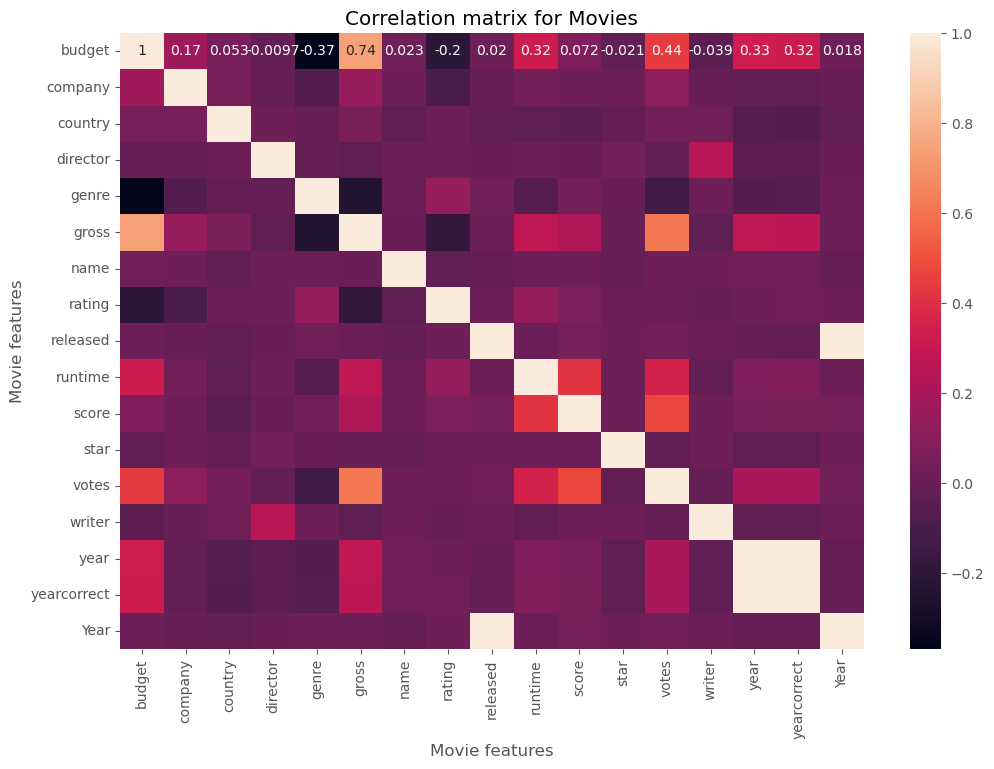

In [184]:
correlation_matrix = df_numerized.corr(method='pearson')

sns.heatmap(correlation_matrix, annot = True)

plt.title("Correlation matrix for Movies")

plt.xlabel("Movie features")

plt.ylabel("Movie features")

plt.show()

In [198]:
df.corr(numeric_only=True)

,budget,company,country,director,genre,gross,name,rating,released,runtime,score,star,votes,writer,year,yearcorrect,Year
budget,1.000000,0.170235,0.052977,-0.009662,-0.368523,0.740247,0.023392,-0.203946,0.019952,0.318695,0.072001,-0.021473,0.439675,-0.039466,0.327722,0.320312,0.018328
company,0.170235,1.000000,0.048569,-0.008223,-0.071334,0.149553,0.021697,-0.092357,-0.002407,0.037585,0.020656,0.014082,0.118470,-0.003697,-0.014333,-0.018806,-0.002361
country,0.052977,0.048569,1.000000,0.011133,-0.009164,0.060078,-0.025490,0.008230,-0.017228,-0.034477,-0.043051,-0.009990,0.041551,0.022488,-0.066748,-0.073569,-0.016957
director,-0.009662,-0.008223,0.011133,1.000000,-0.008553,-0.029560,0.015246,0.014656,0.002308,0.017433,0.005413,0.036593,-0.010376,0.261735,-0.038354,-0.037371,0.003497
genre,-0.368523,-0.071334,-0.009164,-0.008553,1.000000,-0.244101,0.010996,0.147796,0.022142,-0.059237,0.035106,0.003341,-0.135990,0.017578,-0.073167,-0.069147,0.021306
gross,0.740247,0.149553,0.060078,-0.029560,-0.244101,1.000000,0.005639,-0.181906,0.008501,0.275796,0.222556,-0.000004,0.614751,-0.035885,0.274321,0.268721,0.006873
name,0.023392,0.021697,-0.025490,0.015246,0.010996,0.005639,1.000000,-0.029234,-0.006152,0.010850,0.014450,-0.006882,0.012615,0.012880,0.025542,0.025542,-0.007371
rating,-0.203946,-0.092357,0.008230,0.014656,0.147796,-0.181906,-0.029234,1.000000,0.018083,0.140792,0.065983,0.009196,0.006031,-0.003149,0.019499,0.022021,0.015532
released,0.019952,-0.002407,-0.017228,0.002308,0.022142,0.008501,-0.006152,0.018083,1.000000,0.008975,0.045874,0.015706,0.028833,0.008072,-0.001740,-0.005989,0.996181
runtime,0.318695,0.037585,-0.034477,0.017433,-0.059237,0.275796,0.010850,0.140792,0.008975,1.000000,0.414068,0.010108,0.352303,-0.017561,0.075077,0.075294,0.007167


In [202]:
correlation_matrix = df.corr(numeric_only=True)
corr_pairs = correlation_mat.unstack()
corr_pairs

budget       budget         1.000000
             company       -0.053573
             country        0.016348
             director       0.124051
             genre          0.020893
                              ...   
yearcorrect  star           0.684736
             votes          0.316065
             writer         0.779672
             year           0.950610
             yearcorrect    1.000000
Length: 256, dtype: float64

In [206]:
sorted_pairs = corr_pairs.sort_values()
sorted_pairs

genre        rating        -0.116507
rating       genre         -0.116507
budget       company       -0.053573
company      budget        -0.053573
score        votes         -0.041981
                              ...   
director     director       1.000000
country      country        1.000000
company      company        1.000000
year         year           1.000000
yearcorrect  yearcorrect    1.000000
Length: 256, dtype: float64

In [190]:
for col_name in df.columns:
    if(df[col_name].dtype == 'object'):
        df[col_name]= df[col_name].astype('category')
        df[col_name] = df[col_name].cat.codes

In [210]:
high_corr = sorted_pairs[(sorted_pairs) > 0.5]
high_corr

yearcorrect  company        0.506753
company      yearcorrect    0.506753
name         company        0.535369
company      name           0.535369
year         company        0.537731
                              ...   
director     director       1.000000
country      country        1.000000
company      company        1.000000
year         year           1.000000
yearcorrect  yearcorrect    1.000000
Length: 82, dtype: float64

In [ ]:
#votes and budget has the highest correlation to gross earnings
# company has low correlation